In [1]:
import pandas as pd
import numpy as np
import math as mt
# 次
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

### 〓〓〓〓〓 CSVファイルをOpenする 〓〓〓〓〓

#### ●●CSVから読み込む

In [2]:
df = pd.read_csv("C:\\Dev\\file\\test00_cut.csv", encoding="utf_8")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# 行列カウント
df.shape

(58899, 11)

In [5]:
# typeとisFraudを集計、CASH_OUTとTRANSFERのみがisFraudに関与することがわかる
print(pd.crosstab(df['type'], df['isFraud']))

isFraud       0   1
type               
CASH_IN   10758   0
CASH_OUT  16723  53
DEBIT       713   0
PAYMENT   25174   0
TRANSFER   5427  51


In [48]:
# CASH_OUTとTRANSFER以外は使用しないため削除する
# df=df[df["type"]!="CASH_IN"]
# df=df[df["type"]!="DEBIT"]
# df=df[df["type"]!="PAYMENT"]

In [49]:
# 削除後のデータ検証
# print(pd.crosstab(df['type'], df['isFraud']))
# df.shape

### 〓〓〓〓〓 データクリーニング 〓〓〓〓〓

#### ●●欠損値除去

In [6]:
# データ型を確認する
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [7]:
#欠損値（値がないものでNaNと表記されるもの）カウント
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# 欠損箇所に値を設定する（単純に数値指定で補完）
LT1 = df.fillna(0)
print(LT1.tail())
# print(df.fillna(0).tail())

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
58894     9  CASH_OUT  279236.23   C631445061            0.0             0.0   
58895     9  CASH_OUT   94325.38  C1849401433            0.0             0.0   
58896     9  CASH_OUT   50275.57  C1796815390            0.0             0.0   
58897     9  CASH_OUT   50275.57  T9999999991            0.0             0.0   
58898     9  CASH_OUT   50275.57  T9999999992            0.0             0.0   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
58894  C1567808902      3712768.01      4356512.13        0               0  
58895  C1988058126       224307.77      2049971.98        0               0  
58896    C80361763       195947.16       246222.73        0               0  
58897    C80361763       195947.16       246222.73        0               0  
58898    C80361763       195947.16       246222.73        0               0  


In [12]:
# 欠損箇所に値を設定する（平均値で補完）
LT2 = df.fillna(df.mean())
print(LT2.tail())

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
58894     9  CASH_OUT  279236.23   C631445061       0.000000         0.00000   
58895     9  CASH_OUT   94325.38  C1849401433       0.000000         0.00000   
58896     9  CASH_OUT   50275.57  C1796815390       0.000000         0.00000   
58897     9  CASH_OUT   50275.57  T9999999991  730123.608671         0.00000   
58898     9  CASH_OUT   50275.57  T9999999992       0.000000    744021.33052   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
58894  C1567808902      3712768.01      4356512.13        0               0  
58895  C1988058126       224307.77      2049971.98        0               0  
58896    C80361763       195947.16       246222.73        0               0  
58897    C80361763       195947.16       246222.73        0               0  
58898    C80361763       195947.16       246222.73        0               0  


In [13]:
# 欠損値を含む行を削除する
# 指定した列内にNaNが存在する場合、NaNを含む行を削除
LT3 = df.dropna(subset=['oldbalanceOrg'])
print(LT3.tail())

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
58893     9  CASH_OUT   35787.18  C1490036793            0.0             0.0   
58894     9  CASH_OUT  279236.23   C631445061            0.0             0.0   
58895     9  CASH_OUT   94325.38  C1849401433            0.0             0.0   
58896     9  CASH_OUT   50275.57  C1796815390            0.0             0.0   
58898     9  CASH_OUT   50275.57  T9999999992            0.0             NaN   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
58893   C737969496       365843.37       575869.15        0               0  
58894  C1567808902      3712768.01      4356512.13        0               0  
58895  C1988058126       224307.77      2049971.98        0               0  
58896    C80361763       195947.16       246222.73        0               0  
58898    C80361763       195947.16       246222.73        0               0  


In [14]:
# 欠損値を含む列を削除する
# 「subset」で指定した行にNaNがある場合、該当の列を削除する
LT4 = df.dropna(subset=[58897, 58898], axis=1)
print(LT4.tail())

       step      type     amount     nameOrig     nameDest  oldbalanceDest  \
58894     9  CASH_OUT  279236.23   C631445061  C1567808902      3712768.01   
58895     9  CASH_OUT   94325.38  C1849401433  C1988058126       224307.77   
58896     9  CASH_OUT   50275.57  C1796815390    C80361763       195947.16   
58897     9  CASH_OUT   50275.57  T9999999991    C80361763       195947.16   
58898     9  CASH_OUT   50275.57  T9999999992    C80361763       195947.16   

       newbalanceDest  isFraud  isFlaggedFraud  
58894      4356512.13        0               0  
58895      2049971.98        0               0  
58896       246222.73        0               0  
58897       246222.73        0               0  
58898       246222.73        0               0  


In [15]:
# 欠損値除去後のデータ型を確認
print(LT1.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [16]:
# 欠損値が存在しないことを確認
LT1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [17]:
LT1.groupby("type").count()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,,,
CASH_IN,10758,10758,10758,10758,10758,10758,10758,10758,10758,10758
CASH_OUT,16776,16776,16776,16776,16776,16776,16776,16776,16776,16776
DEBIT,713,713,713,713,713,713,713,713,713,713
PAYMENT,25174,25174,25174,25174,25174,25174,25174,25174,25174,25174
TRANSFER,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478


### 〓〓〓〓〓 モデル構築/検証 〓〓〓〓〓

#### ●●ロジスティック回帰

In [9]:
from pandas import Series, DataFrame
import math

# プロット用
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [10]:
# 機械学習に必要なモジュールのインポート
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# 予測の精度を計算
from sklearn import metrics

import statsmodels.api as sm

C:\Dev\WinPython\python-3.6.5.amd64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# 使用しない列は削除する
# HDRをリネームする
df_re = df.rename(columns={'oldbalanceOrg':'oldBOrig', 'newbalanceOrig':'newBOrig'})

# 未使用列削除
df1 = df_re.drop(['step', 'nameOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'], axis=1)
df1.head()

,type,amount,oldBOrig,newBOrig,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0
1,PAYMENT,1864.28,21249.0,19384.72,0
2,TRANSFER,181.00,181.0,0.00,1
3,CASH_OUT,181.00,181.0,0.00,1
4,PAYMENT,11668.14,41554.0,29885.86,0


In [12]:
#欠損値（値がないものでNaNと表記されるもの）カウント
df1.isnull().sum()

type        0
amount      0
oldBOrig    1
newBOrig    1
isFraud     0
dtype: int64

In [13]:
# 欠損箇所に値を設定する（平均値で補完）
df2 = df1.fillna(df1.mean())
df2.isnull().sum()

type        0
amount      0
oldBOrig    0
newBOrig    0
isFraud     0
dtype: int64

In [14]:
# typeを数値に置換する
def rep_type(x):
    if x == 'PAYMENT':
        return 1
    elif x == 'DEBIT':
        return 2
    elif x == 'TRANSFER':
        return 3
    elif x == 'CASH_IN':
        return 4
    elif x == 'CASH_OUT':
        return 5    

In [15]:
df2['Retype'] = df2['type'].apply(rep_type)
df2.head()

,type,amount,oldBOrig,newBOrig,isFraud,Retype
0,PAYMENT,9839.64,170136.0,160296.36,0,1
1,PAYMENT,1864.28,21249.0,19384.72,0,1
2,TRANSFER,181.00,181.0,0.00,1,3
3,CASH_OUT,181.00,181.0,0.00,1,5
4,PAYMENT,11668.14,41554.0,29885.86,0,1


#### ●●データの可視化

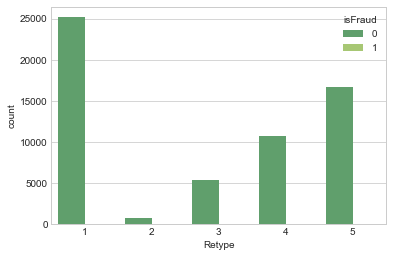

In [16]:
# type毎のisFraud件数をカウント
sns.countplot(x='Retype', hue='isFraud', data=df2, palette='summer')

#### ●●前処理

In [28]:
Y = df2.isFraud

In [29]:
X = df2.drop(['type', 'isFraud'], axis=1)
X.head()

,amount,oldBOrig,newBOrig,Retype
0,9839.64,170136.0,160296.36,1
1,1864.28,21249.0,19384.72,1
2,181.00,181.0,0.00,3
3,181.00,181.0,0.00,5
4,11668.14,41554.0,29885.86,1


In [30]:
# Yの値をarrayに変形する
Y = np.ravel(Y)

In [31]:
# インスタンス作成
log_model = LogisticRegression()

In [32]:
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
# 作られたモデルのスコアを見る
# Xを使用しYがどの程度の確率で予測できるのかを見る（予測の精度）
log_model.score(X, Y)

0.99942274062377967

In [34]:
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T

In [35]:
coeff_df

,0,1
0,amount,-0.00048772
1,oldBOrig,0.000489094
2,newBOrig,-0.000763926
3,Retype,-0.000213522


In [36]:
# 学習用データ、予測用データを分割する
# 通常機械学習では、データを学習用・テスト用と分けておき、テスト用データは最後に精度見積もりで使用する
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [37]:
log_model2 = LogisticRegression()

In [38]:
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
class_predict = log_model2.predict(X_test)

In [40]:
class_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
# テスト用データのみを使用し予測しているため、正確性の検証を行う
metrics.accuracy_score(Y_test, class_predict)

0.99884550084889645